# Линейная алгебра: сходство текстов и аппроксимация функций

## Задача 1: сравнение предложений

Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:
* кошки (животные)
* UNIX-утилита cat для вывода содержимого файлов
* версии операционной системы OS X, названные в честь семейства кошачьих

Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

Выполните следующие шаги:
1. Скачайте файл с предложениями (sentences.txt).
2. Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().
3. Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.
4. Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.
5. Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.
6. Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.
7. Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса.
8. Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

In [18]:
# Считывание и подготовка слов
import re
stream = open('sentences.txt')
sentences = [line.lower() for line in stream] # Считывание предложений в нижнем регистре
stream.close()
words = []
for i in range(len(sentences)):
    sentences[i] = [word for word in re.split('[^a-z]', sentences[i]) if word] # Разбиение на отдельные слова
    words += sentences[i]
words = set(words)

In [19]:
# Формируем вектора
array = [[sentence.count(word) for word in words] for sentence in sentences]

In [22]:
# Считаем косинусные расстояния от первого предложения до всех остальных
from scipy.spatial import distance
distances = [distance.cosine(array[0], array[i]) for i in range(1, len(array))]

In [23]:
# Ищем два ближайших предложения, т.е. расстояние до которых минимально
min_index = 0
premin_index = 0
for i in range(len(distances)):
    if (distances[i] < distances[min_index]):
        premin_index = min_index
        min_index = i
    elif (distances[i] < distances[premin_index]):
        premin_index = i
print(min_index + 1, premin_index + 1)

6 4


## Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

<img src="plot_example.png">

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

<img src="system.png">

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
4. Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса.

In [28]:
# Задаём функцию f(x)
from math import sin, exp
def f(x):
    return sin(x / 5.0) * exp(x / 10.0) + 5 * exp(-x / 2.0)

In [29]:
# Задаём аппроксимирующие точки
x = [1, 4, 10, 15]

In [30]:
# Находим коэффициенты аппроксимации функции, решая матричное уравнение
import numpy as np
from scipy.linalg import solve
X = np.array([[pow(x[i], j) for j in range(len(x))] for i in range(len(x))])
B = np.array([f(i) for i in x])
Weights = solve(X, B)
print(Weights)

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


In [31]:
# Задаём аппроксимирующую функцию
def F(x):
    sum = 0
    for i in range(len(Weights)):
        sum += Weights[i]*pow(x, i)
    return sum

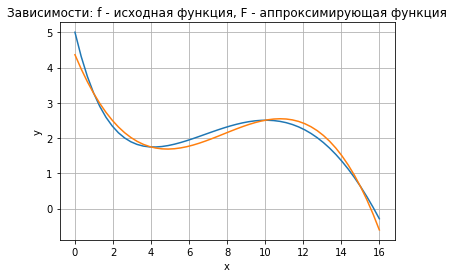

In [39]:
# Построение графика
import matplotlib.pyplot as plt
%matplotlib inline

dom = np.linspace(0, 16, 50)
y1 = [f(i) for i in dom]
y2 = [F(i) for i in dom]

plt.title("Зависимости: f - исходная функция, F - аппроксимирующая функция")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.plot(dom, y1, dom, y2)
plt.show()